# Enunciado

Realizar el ejercicio 2 de Naive Bayes y KNN con árboles de decisión.

# 1. Importación de los datos

In [19]:
import pandas as pd

# Cargamos el conjunto de datos desde el archivo CSV
df = pd.read_csv('csv/data2.csv')

# Convertimos la columna 'Label' a tipo de datos entero (int)
df['Label'] = df['Label'].astype('int')

# Mostramos el DataFrame resultante
print(df)


,Feature_1,Feature_2,Label
0,0.496714,0.000000,0
1,0.647689,1.523030,0
2,0.000000,0.000000,0
3,1.579213,0.767435,0
4,0.000000,0.542560,0
...,...,...,...
995,3.800410,3.754291,1
996,4.188913,3.708304,1
997,3.351448,4.070150,1
998,2.973479,2.118125,1


# 2. Preparación de los datos

In [20]:
# Separar los datos de entrada y salida
X = df.drop('Label', axis=1)
y = df['Label']

# 3. Visualización de los datos

C:\Users\Marcos\AppData\Local\Temp\ipykernel_16320\2197465472.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  for i, data in enumerate(df.groupby('Label').apply(lambda x: x[['Feature_1', 'Feature_2']].values)):


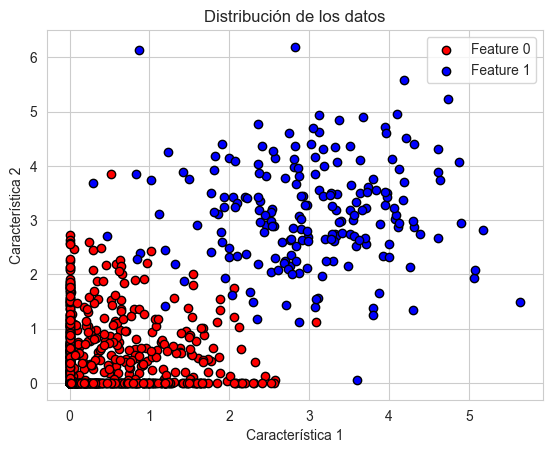

In [21]:
from matplotlib import pyplot as plt

# Definimos colores para las etiquetas 'Label'
COLORS = ['red', 'blue']

# Iteramos sobre los grupos formados por la etiqueta 'Label' y las características 'Feature_1' y 'Feature_2'
for i, data in enumerate(df.groupby('Label').apply(lambda x: x[['Feature_1', 'Feature_2']].values)):
    # Creamos un gráfico de dispersión para cada grupo
    plt.scatter(data[:, 0], data[:, 1], c=COLORS[i], edgecolors='k', label=f'Feature {i}')

# Configuramos el título y las etiquetas de los ejes
plt.title('Distribución de los datos')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

# Agregamos la leyenda para identificar las características
plt.legend()

# Mostramos el gráfico
plt.show()


# 4. Visualización de la distribución de los datos

Label
0    800
1    200
Name: Label, dtype: int64


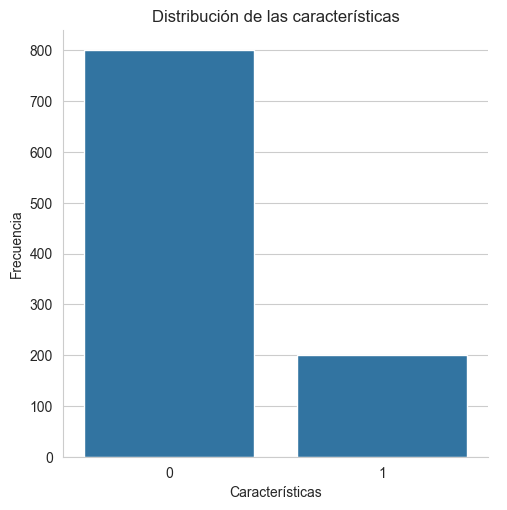

In [22]:
import seaborn as sns
from matplotlib import pyplot as plt

# Configuramos el estilo de seaborn
sns.set_style('whitegrid')

# Imprimimos la frecuencia de cada etiqueta
print(df['Label'].groupby(df['Label']).size())

# Creamos un gráfico de barras para visualizar la distribución de las etiquetas
sns.catplot(x='Label', kind='count', data=df)

# Configuramos el título y las etiquetas de los ejes
plt.title('Distribución de las características')
plt.xlabel('Características')
plt.ylabel('Frecuencia')

# Mostramos el gráfico
plt.show()


# 5. Preparación del conjunto de datos

In [23]:
from sklearn.model_selection import train_test_split

# Proporción de datos que se asignarán al conjunto de entrenamiento
p_train = 0.7

# Dividimos el conjunto de datos en conjuntos de entrenamiento y prueba
train, test = train_test_split(df, train_size=p_train, random_state=42)

# Reiniciamos los índices para los conjuntos de entrenamiento y prueba
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

# Imprimimos las dimensiones de los conjuntos de entrenamiento y prueba
print(f'Train: {train.shape}')
print(f'Test: {test.shape}')

# Imprimimos las primeras filas de los conjuntos de entrenamiento y prueba
print("Conjunto de entrenamiento:")
print(train.head())

print("Conjunto de prueba:")
print(test.head())


Train: (700, 4)
Test: (300, 4)
Conjunto de entrenamiento:
   index  Feature_1  Feature_2  Label
0    541   0.000000   2.076748      0
1    440   2.526932   0.000000      0
2    482   0.000000   1.440117      0
3    422   0.166452   0.492451      0
4    778   0.913585   0.000000      0
Conjunto de prueba:
   index  Feature_1  Feature_2  Label
0    521   1.078681   0.000000      0
1    737   0.000000   0.648280      0
2    740   0.722381   0.000000      0
3    660   0.056650   0.529693      0
4    411   2.298898   0.000000      0


# 6. Validación cruzada

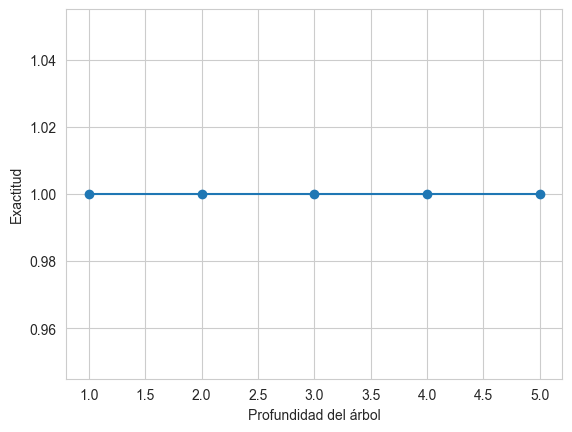

In [24]:
from sklearn import tree
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# Configuramos la validación cruzada con KFold (5 divisiones sin aleatoriedad)
cv = KFold(n_splits=5, shuffle=False)

# Inicializamos una lista para almacenar las exactitudes de cada modelo
accuracies = list()

# Calculamos el número máximo de atributos en el conjunto de datos
max_attributes = len(list(df))
depth_range = range(1, max_attributes * 2)

# Probamos diferentes profundidades para los árboles de decisión
for depth in depth_range:
    fold_accuracy = []  # Lista para almacenar las exactitudes en cada fold
    
    # Creamos un modelo de árbol de decisión con la profundidad actual
    tree_model = tree.DecisionTreeClassifier(
        criterion='entropy',
        max_depth=depth
    )
    
    # Iteramos sobre las divisiones del conjunto de entrenamiento y prueba
    for train_fold, test_fold in cv.split(train):
        f_train = train.loc[train_fold]  # Conjunto de entrenamiento en este fold
        f_test = train.loc[test_fold]    # Conjunto de prueba en este fold

        # Entrenamos el modelo en el conjunto de entrenamiento actual
        model = tree_model.fit(X=f_train.drop(['Label'], axis=1),
                               y=f_train['Label'])
        
        # Evaluamos la exactitud en el conjunto de prueba actual
        test_acc = model.score(X=f_test.drop(['Label'], axis=1),
                               y=f_test['Label'])
        
        fold_accuracy.append(test_acc)  # Almacenamos la exactitud en este fold
        
    accuracies.append(np.mean(fold_accuracy))  # Calculamos la exactitud promedio para esta profundidad

# Mostramos los resultados en un gráfico
plt.plot(depth_range, accuracies, marker='o')
plt.xlabel('Profundidad del árbol')
plt.ylabel('Exactitud')
plt.show()


# 7. Creación del modelo

In [25]:
from sklearn.metrics import classification_report

# Entrenamos el modelo con la profundidad que maximiza la exactitud
X_train = train[['Feature_1', 'Feature_2']]
y_train = train['Label']
X_test = test[['Feature_1', 'Feature_2']]
y_test = test['Label']

# Creamos un modelo de árbol de decisión con la profundidad óptima
model = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=1
)

# Lo entrenamos con el conjunto de entrenamiento
model = model.fit(X=X_train, y=y_train)

# Predecimos la salida con el conjunto de prueba
y_pred = model.predict(X_test)

# Mostramos el reporte de clasificación
print(classification_report(test['Label'], y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       236
           1       0.87      0.91      0.89        64

    accuracy                           0.95       300
   macro avg       0.92      0.93      0.93       300
weighted avg       0.95      0.95      0.95       300



# 8. Visualización del modelo

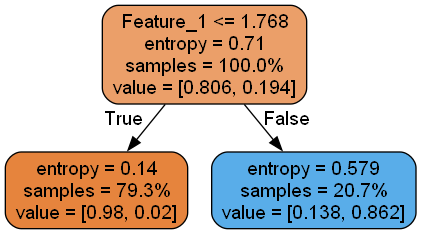

In [26]:
import pydot
from IPython.display import Image
from sklearn import tree
from io import StringIO

# Suponiendo que 'tree_model' es el modelo de árbol de decisión entrenado
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=optimal_depth)

# Exportamos el árbol a formato DOT
dot_data = StringIO()

tree.export_graphviz(
    tree_model,  # Utilizamos el modelo entrenado
    out_file=dot_data,
    proportion=True,
    feature_names=X_train.columns,
    rounded=True,
    filled=True
)

# Mostramos el árbol
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())
